# 互评作业三：分类、预测、与聚类

**姓名**：王英杰  
**学号**：5720201111 

**GitHub**: <https://github.com/YingjieWang0311/data-mining>

# 目录

### 数据集：Hotel Booking Demand
**1 数据基本信息**   

**2 基本情况**

- 城市酒店和假日酒店预订需求和入住率比较

**3 用户行为**

- 提前预订时间

- 入住时长

- 预订间隔

- 餐食预订情况

**4 最佳预订酒店时间**

**5 利用Logistic预测酒店预订**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 1 数据基本信息

读取数据

In [2]:
data = pd.read_csv("hotel_bookings.csv")

数据集中共有32列，119390行。其中有20列是数值属性，12列是标称属性。

In [3]:
print('%d columns' % len(data.columns))
print('%d rows' % len(data.index))
print(data.dtypes.value_counts())

32 columns
119390 rows
int64      16
object     12
float64     4
dtype: int64


数据的前5行展示如下：

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015/7/1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015/7/1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015/7/2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015/7/2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015/7/3


缺失值统计：

In [5]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 2 基本情况

**城市酒店和假日酒店预订需求和入住率比较**：

度假酒店的预定量为40060，低于城市酒店的预定量79330.

而度假酒店的入住率为72.24%，高于城市酒店的入住率58.27%。

In [6]:
Resort_reservation = data[data['hotel'] == 'Resort Hotel'].shape[0]
City_reservation = data[data['hotel'] == 'City Hotel'].shape[0]
Resort_occupancy = data[(data['hotel'] == 'Resort Hotel')&(data['is_canceled'] == 0)].shape[0]
City_occupancy = data[(data['hotel'] == 'City Hotel')&(data['is_canceled'] == 0)].shape[0]
print('度假酒店预定量：'+str(Resort_reservation))
print('城市酒店预定量：'+str(City_reservation))
print('度假酒店入住率：'+str(Resort_occupancy/Resort_reservation))
print('城市酒店入住率：'+str(City_occupancy/City_reservation))

度假酒店预定量：40060
城市酒店预定量：79330
度假酒店入住率：0.7223664503245132
城市酒店入住率：0.5827303668221354


### 3 用户行为

**提前预定时间**：

从直方图可以看出，大多数用户会在入住前100天内进行酒店预订。

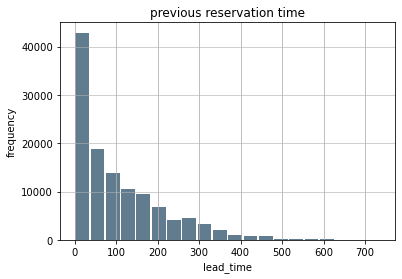

In [7]:
size, scale = 1000, 10
data['lead_time'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('previous reservation time')
plt.xlabel('lead_time')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**入住时长**：

从直方图可以看出，绝大多数住户的入住时长在10天之内，但也有极少数用户会常住,其中最长入住时长达到69天。

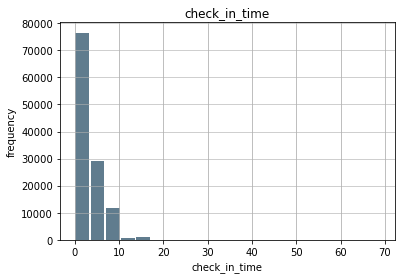

最长入住时长：69


In [8]:
check_in_time = data['stays_in_weekend_nights']+data['stays_in_week_nights']

size, scale = 1000, 10
check_in_time.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('check_in_time')
plt.xlabel('check_in_time')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("最长入住时长："+str(check_in_time.max()))

**预定间隔**：

通过查看属性**is_repeated_guest**可知，绝大多数用户都是首次入住。

并且，每条记录并没有包括用户ID等能够准确标记每个用户的标识信息。

因此，无法对用户的预定间隔进行分析。

In [9]:
data['is_repeated_guest'] = data['is_repeated_guest'].astype('object')
col = data['is_repeated_guest'].value_counts()
print('Colunm name:', 'is_repeated_guest')
print('%d different values.' % len(col))
print()
col_data = col.to_frame()
col_data['frequency'] = col.apply(lambda x: x / len(data.index))
col_data.rename(columns={'is_repeated_guest': 'counts'}, inplace=True)
print(col_data.iloc[:len(col)])

Colunm name: is_repeated_guest
2 different values.

   counts  frequency
0  115580   0.968088
1    3810   0.031912


**餐食预定情况**：

通过查看属性**meal**可知，BB餐食预定的用户最多，占到77.32%；

而FB餐食预定最少，仅占0.67%；同时也有0.98%的用户没有订餐。

In [10]:
col = data['meal'].value_counts()
print('Colunm name:', 'meal')
print('%d different values.' % len(col))
print()
col_data = col.to_frame()
col_data['frequency'] = col.apply(lambda x: x / len(data.index))
col_data.rename(columns={'meal': 'counts'}, inplace=True)
print(col_data.iloc[:len(col)])

Colunm name: meal
5 different values.

           counts  frequency
BB          92310   0.773180
HB          14463   0.121141
SC          10650   0.089203
Undefined    1169   0.009791
FB            798   0.006684


### 4 最佳预定酒店时间：

通过观察折线图可知，八月份的**ADR**均值最高，一月份的**ADR**均值最低。

观察折线图趋势可知，夏季月份的**ADR**均值整体上高于冬季月份的**ADR**均值。

因此，最佳酒店预定时间为11月-2月。

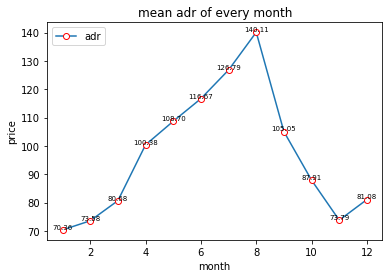

In [11]:
Jan = data[data['arrival_date_month']=='January']
Feb = data[data['arrival_date_month']=='February']
Mar = data[data['arrival_date_month']=='March']
Apr = data[data['arrival_date_month']=='April']
May = data[data['arrival_date_month']=='May']
Jun = data[data['arrival_date_month']=='June']
July =data[data['arrival_date_month']=='July']
Aug = data[data['arrival_date_month']=='August']
Sep = data[data['arrival_date_month']=='September']
Oct = data[data['arrival_date_month']=='October']
Nov = data[data['arrival_date_month']=='November']
Dec = data[data['arrival_date_month']=='December']

y = [Jan['adr'].mean(), Feb['adr'].mean(), Mar['adr'].mean(), Apr['adr'].mean(),May['adr'].mean(),
     Jun['adr'].mean(),July['adr'].mean(),Aug['adr'].mean(),Sep['adr'].mean(),Oct['adr'].mean(),
     Nov['adr'].mean(),Dec['adr'].mean()]
x = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.plot(x,y,marker='o', mec='r', mfc='w',label='adr')
plt.xlabel('month')
plt.ylabel('price')
for a, b in zip(x,y):
    plt.text(a,b,'%.2f'% b, ha='center', va='bottom', fontsize=7)
plt.legend(loc=2)
plt.title("{}".format('mean adr of every month'))
plt.show()

### 5 利用Logistic预测酒店预订

选择利用属性**arrival_date_week_number**、**stays_in_weekend_nights**、**stays_in_week_nights**、**adults**来预测属性**ADR**，即每晚的房间均价。

其中，属性**arrival_date_week_number**代表的是入住月份对**ADR**的影响；

属性**stays_in_weekend_nights**和**stays_in_week_nights**代表的是入住天数对**ADR**的影响；

属性**adults**代表的是入住人数对**ADR**的影响。

拟合曲线的阶数选择为6，散点图中蓝点表示(y_test,y_pred),橙点表示(y_test,y_test)用以绘制y=x曲线。

通过散点图可以看出，拟合效果很一般。

平均绝对误差:31.213681104696775
均方误差MSE:1505.1816809665688


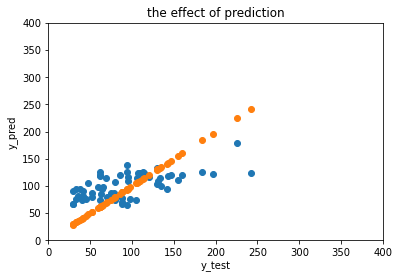

In [12]:
x_data = data[["arrival_date_week_number","stays_in_weekend_nights","stays_in_week_nights","adults"]]
y_data = data["adr"]
X_train,X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.0005, random_state=0)

poly_reg=PolynomialFeatures(degree=6)
x_train_poly=poly_reg.fit_transform(X_train)
x_test_poly=poly_reg.fit_transform(X_test)
lin_reg=LinearRegression()
lin_reg.fit(x_train_poly,y_train)
y_pred=lin_reg.predict(x_test_poly)

print('平均绝对误差:{}'.format(metrics.median_absolute_error(y_pred,y_test)))
print('均方误差MSE:{}'.format(metrics.mean_squared_error(y_pred,y_test)))

plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.title('the effect of prediction')
plt.scatter(y_test, y_pred, marker='o')
plt.scatter(y_test, y_test)
plt.show()